<a href="https://colab.research.google.com/github/jadhavramdas/PRODIGY-DataScience/blob/main/Bank_Marketing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.25.2
pandas version :  2.0.3
seaborn version :  0.13.1


In [19]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [20]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

In [21]:
df=pd.read_csv('/content/bank-marketing[1].csv')

# developer-friendly column names and format
df.columns = [x.lower().replace('-', '_').replace(' ', '_') for x in df.columns.to_list()]

df.sample(5, random_state=42)

,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
3776,40,4,Y,blue-collar,20000,married,secondary,married-secondary,yes,no,580,yes,no,unknown,16,may,192,1,-1,0,unknown,no,0
9928,47,4,Y,services,70000,single,secondary,single-secondary,yes,no,3644,no,no,unknown,9,jun,83,2,-1,0,unknown,no,0
33409,25,2,Y,student,4000,single,tertiary,single-tertiary,no,no,538,yes,no,cellular,20,apr,226,1,-1,0,unknown,no,0
31885,42,4,Y,management,100000,married,tertiary,married-tertiary,yes,no,1773,no,no,cellular,9,apr,311,1,336,1,failure,no,0
15738,56,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,217,no,yes,cellular,21,jul,121,2,-1,0,unknown,no,0


In [22]:
df.isna().sum()

age                  0
age_group            0
eligible             0
job                  0
salary               0
marital              0
education            0
marital_education    0
targeted             0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
response             0
dtype: int64

In [23]:
for x in df.columns.to_list():
    print(x + ' :')
    print(df[x].sort_values().unique())
    print('')

age :
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
 90 92 93 94 95]

age_group :
[1 2 3 4 5 6 7 8 9]

eligible :
['N' 'Y']

job :
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']

salary :
[     0   4000   8000  16000  20000  50000  55000  60000  70000 100000
 120000]

marital :
['divorced' 'married' 'single']

education :
['primary' 'secondary' 'tertiary' 'unknown']

marital_education :
['divorced-primary' 'divorced-secondary' 'divorced-tertiary'
 'divorced-unknown' 'married-primary' 'married-secondary'
 'married-tertiary' 'married-unknown' 'single-primary' 'single-secondary'
 'single-tertiary' 'single-unknown']

targeted :
['no' 'yes']

default :
['no' 'yes']

balance :
[ -8019  -6847  -4057 ...  81204  98417 10212

In [24]:
non_target_columns = df.columns.to_list()
non_target_columns.remove('y')
non_target_columns.remove('response')

df.duplicated(non_target_columns).sum()

0

In [25]:
if 'y' in df.columns.to_list():
  df = df.drop(['y'], axis = 1)

df.sample(5)

,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
42905,34,3,Y,management,100000,single,tertiary,single-tertiary,no,no,382,no,no,cellular,5,feb,148,1,94,1,failure,0
11360,42,4,Y,technician,60000,married,secondary,married-secondary,yes,no,370,no,no,unknown,19,jun,302,5,-1,0,unknown,0
2103,29,2,Y,technician,60000,married,secondary,married-secondary,yes,no,0,no,no,unknown,12,may,33,2,-1,0,unknown,0
14272,27,2,Y,admin.,50000,married,secondary,married-secondary,yes,yes,-517,yes,no,cellular,14,jul,172,3,-1,0,unknown,0
38013,55,5,Y,blue-collar,20000,married,primary,married-primary,yes,no,-219,yes,no,telephone,14,may,427,2,364,4,failure,0


In [26]:
df.pdays = df.pdays.apply(lambda x: 0 if (x == -1) else x)
df.sample(5, random_state=42)

,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
3776,40,4,Y,blue-collar,20000,married,secondary,married-secondary,yes,no,580,yes,no,unknown,16,may,192,1,0,0,unknown,0
9928,47,4,Y,services,70000,single,secondary,single-secondary,yes,no,3644,no,no,unknown,9,jun,83,2,0,0,unknown,0
33409,25,2,Y,student,4000,single,tertiary,single-tertiary,no,no,538,yes,no,cellular,20,apr,226,1,0,0,unknown,0
31885,42,4,Y,management,100000,married,tertiary,married-tertiary,yes,no,1773,no,no,cellular,9,apr,311,1,336,1,failure,0
15738,56,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,217,no,yes,cellular,21,jul,121,2,0,0,unknown,0


In [27]:
cats= list(df.select_dtypes(include=['object','datetime64[ns]','bool']) )
nums= list(df.select_dtypes(include='int64') )
print(nums)
print(cats)

['age', 'age_group', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']
['eligible', 'job', 'marital', 'education', 'marital_education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


<Axes: >

<Axes: ylabel='age'>

<Axes: >

<Axes: ylabel='age_group'>

<Axes: >

<Axes: ylabel='salary'>

<Axes: >

<Axes: ylabel='balance'>

<Axes: >

<Axes: ylabel='day'>

<Axes: >

<Axes: ylabel='duration'>

<Axes: >

<Axes: ylabel='campaign'>

<Axes: >

<Axes: ylabel='pdays'>

<Axes: >

<Axes: ylabel='previous'>

<Axes: >

<Axes: ylabel='response'>

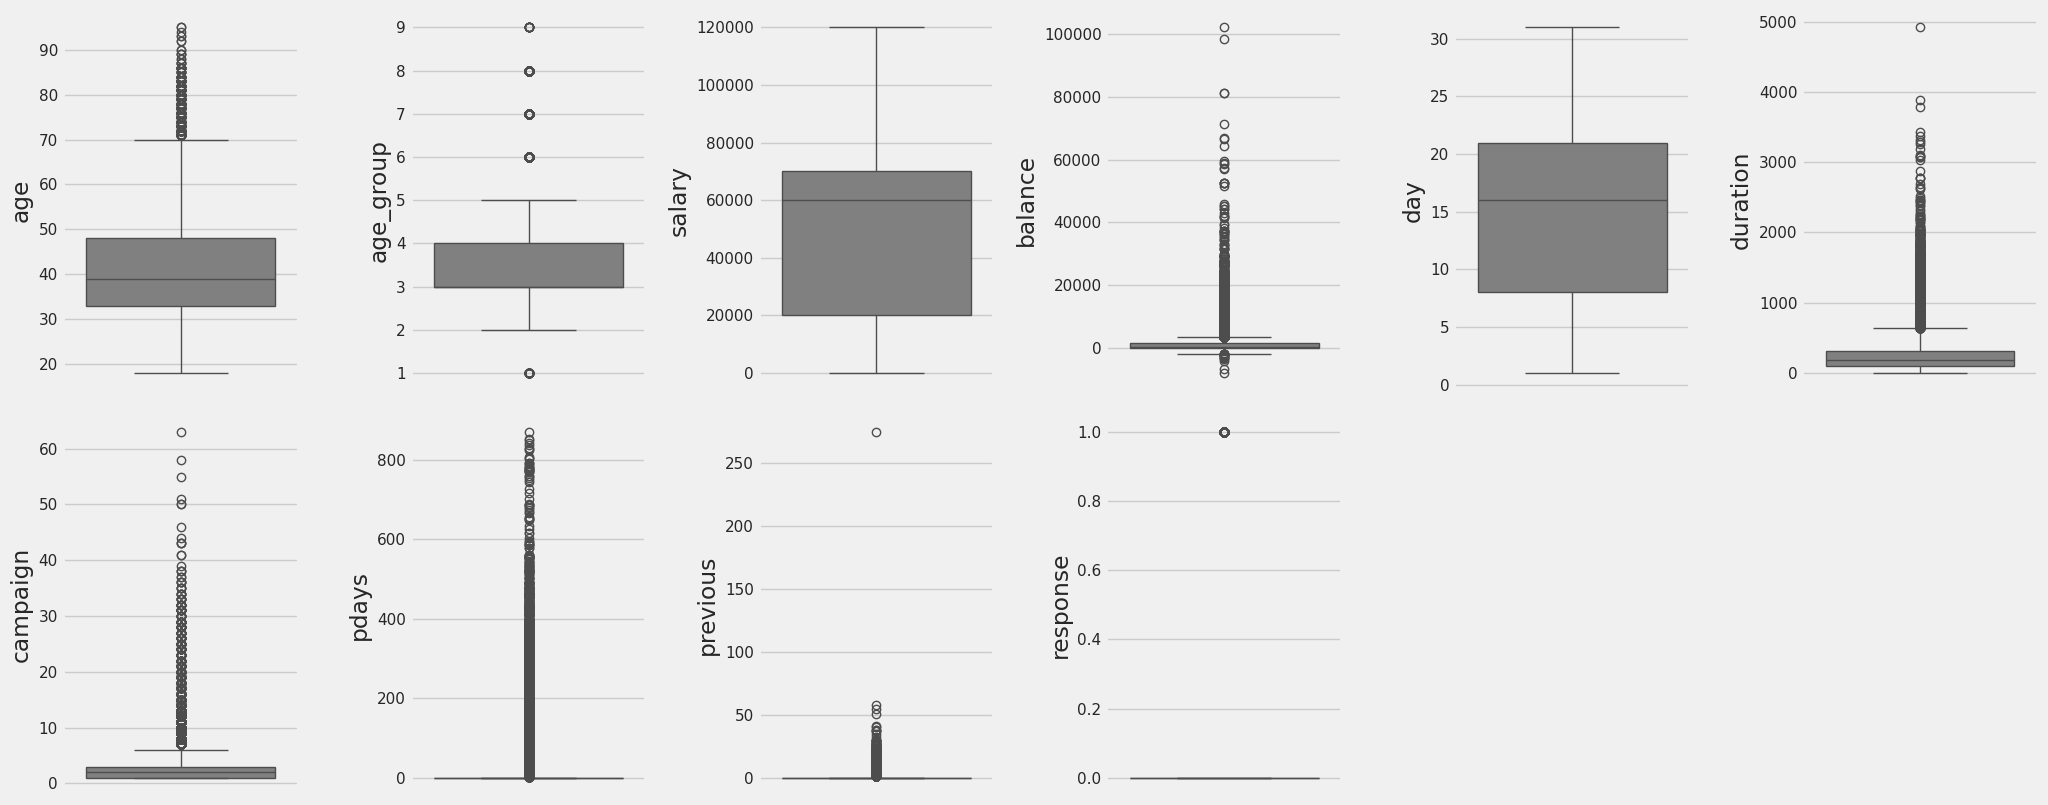

In [29]:
for i in range(0, len(nums)):
    plt.subplot(2, (len(nums)//2) + 1, i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

In [30]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['balance', 'duration', 'campaign']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 45211
Jumlah baris setelah memfilter outlier: 42707


<Figure size 1500x800 with 0 Axes>

<Axes: >

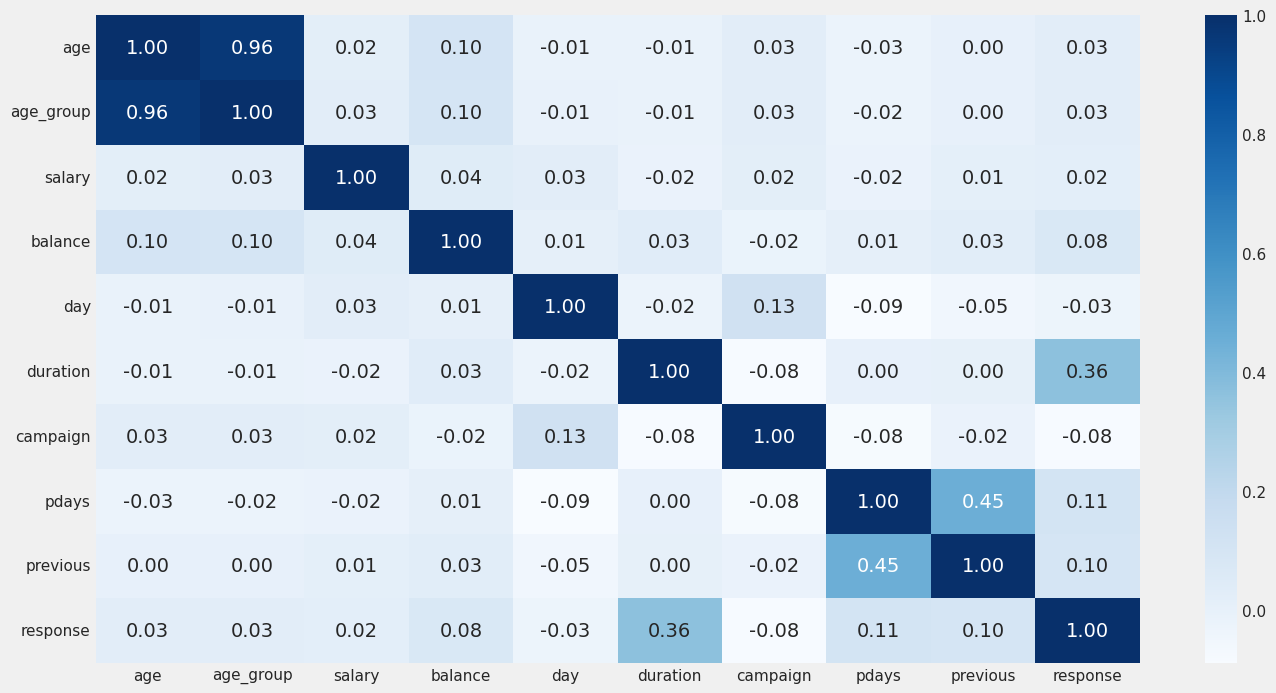

In [33]:
df_new=df.copy()
numerical_df = df_new.select_dtypes(include=['number'])
plt.figure(figsize=(15, 8))
sns.heatmap(numerical_df.corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

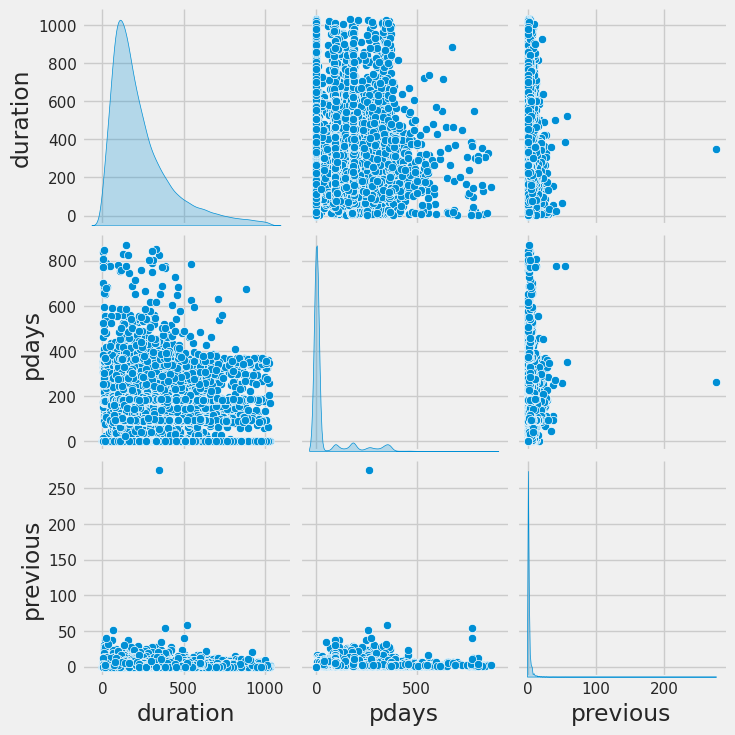

In [34]:
features= ['duration','pdays','previous']
plt.figure(figsize=(15, 15))
sns.pairplot(df_new[features], diag_kind='kde')

<Figure size 1500x500 with 0 Axes>

Text(0, 0.5, 'count')

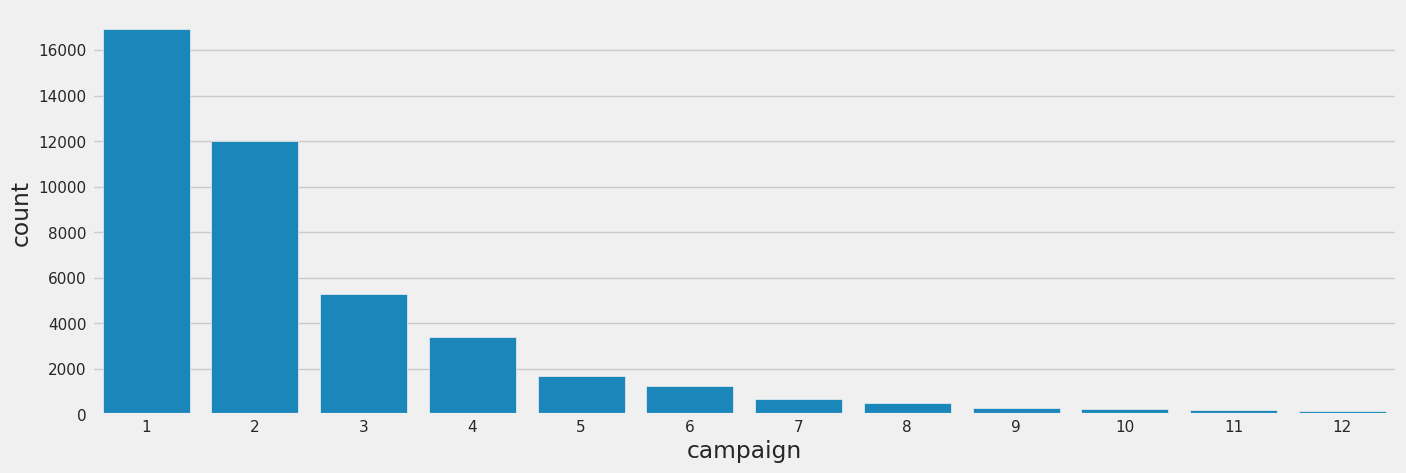

In [35]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='campaign', y='age', data=df_new.groupby(['campaign']).agg('count').reset_index()[['campaign', 'age']])
ax.set_ylabel('count')

<Figure size 2000x2300 with 0 Axes>

<Figure size 2000x2300 with 0 Axes>

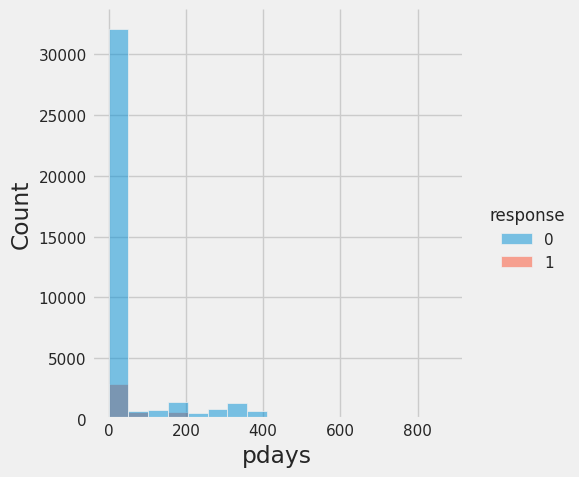

In [36]:
plt.figure(figsize=(20, 23))
sns.displot(x='pdays', hue='response', data=df_new)

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

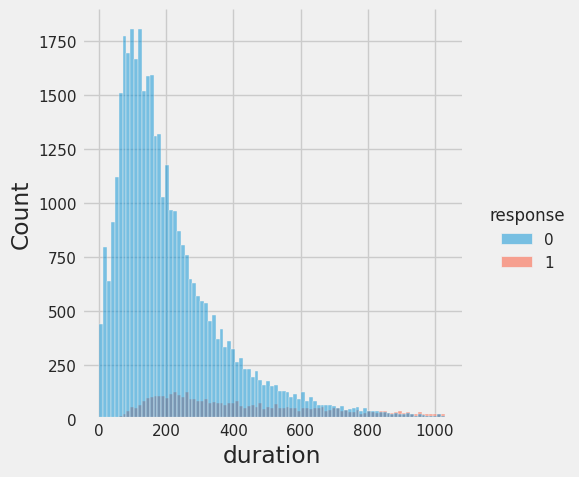

In [37]:
plt.figure(figsize=(15, 5))
sns.displot(x='duration', hue='response', data=df_new)

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='poutcome', ylabel='duration'>

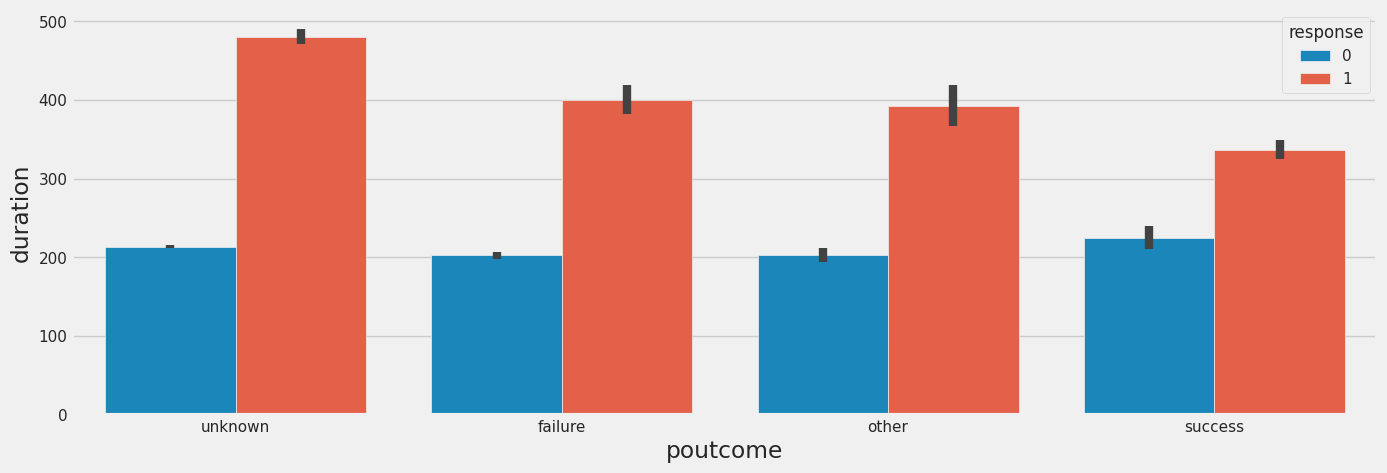

In [38]:
plt.figure(figsize=(15, 5))
sns.barplot(x='poutcome', y='duration' ,hue='response', data=df_new)

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='poutcome', ylabel='pdays'>

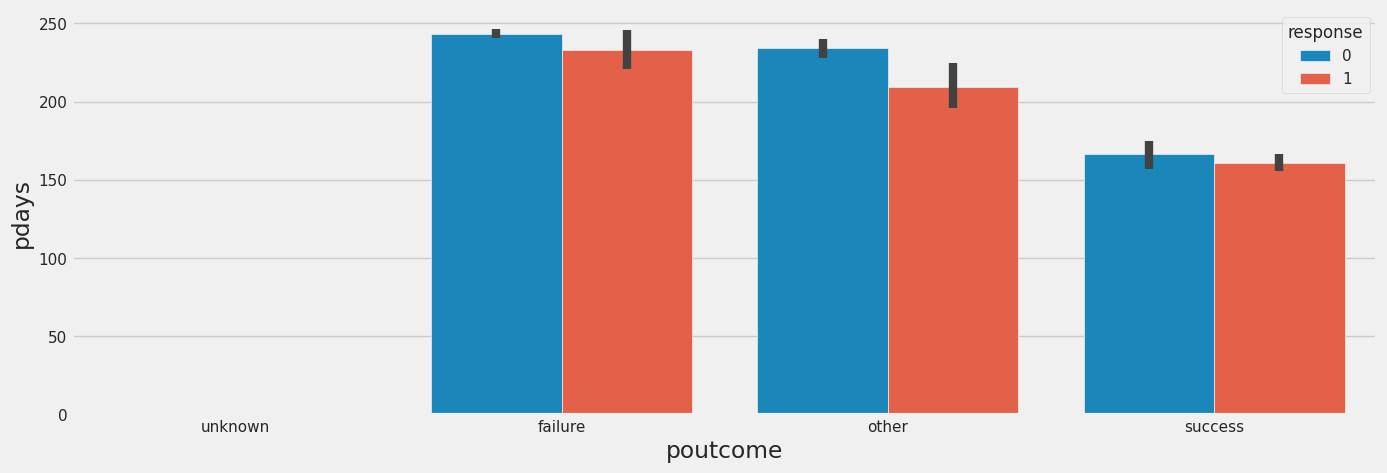

In [39]:
plt.figure(figsize=(15, 5))
sns.barplot(x='poutcome', y='pdays' ,hue='response', data=df_new)

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='housing', ylabel='response'>

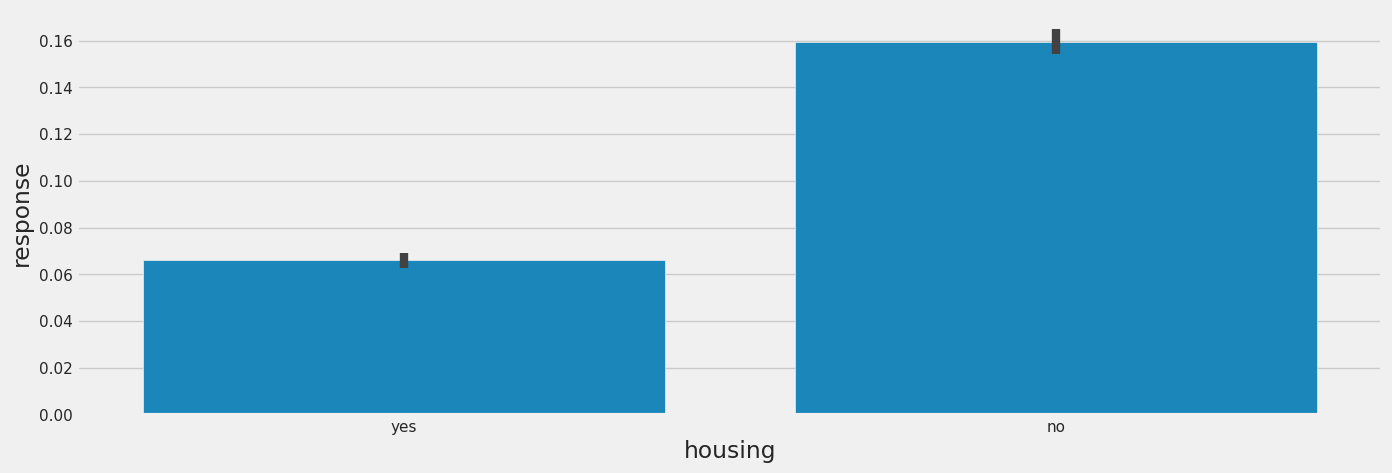

In [40]:
plt.figure(figsize=(15, 5))
sns.barplot(x='housing',y='response',data=df_new)

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='contact', ylabel='duration'>

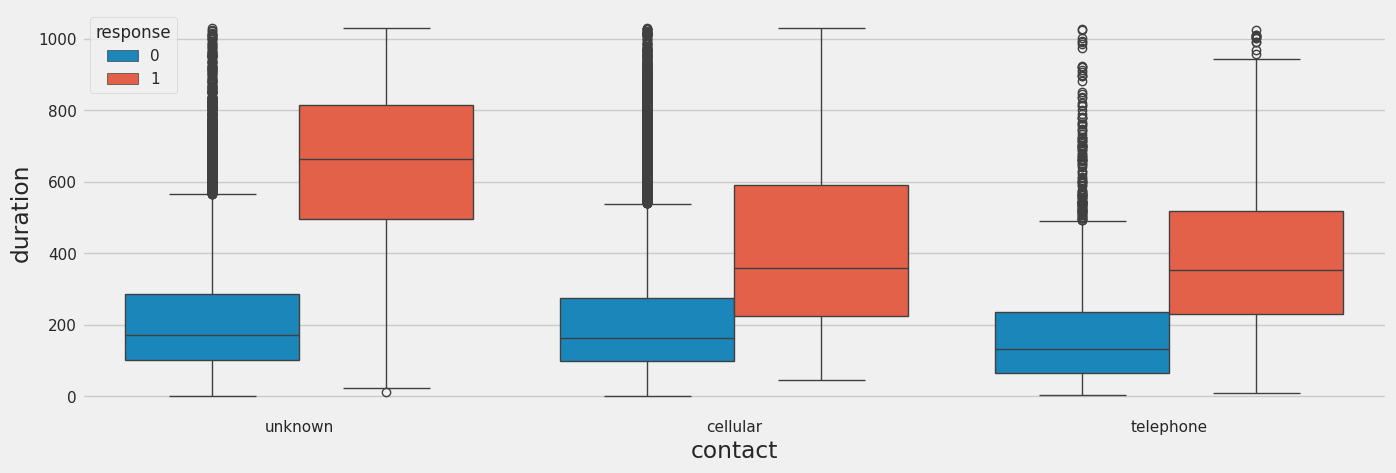

In [42]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='contact',y='duration', hue='response',data=df_new)

<Figure size 1200x1500 with 0 Axes>

<Axes: >

<Axes: xlabel='age', ylabel='Density'>

<Axes: >

<Axes: xlabel='age_group', ylabel='Density'>

<Axes: >

<Axes: xlabel='salary', ylabel='Density'>

<Axes: >

<Axes: xlabel='balance', ylabel='Density'>

<Axes: >

<Axes: xlabel='day', ylabel='Density'>

<Axes: >

<Axes: xlabel='duration', ylabel='Density'>

<Axes: >

<Axes: xlabel='campaign', ylabel='Density'>

<Axes: >

<Axes: xlabel='pdays', ylabel='Density'>

<Axes: >

<Axes: xlabel='previous', ylabel='Density'>

<Axes: >

<Axes: xlabel='response', ylabel='Density'>

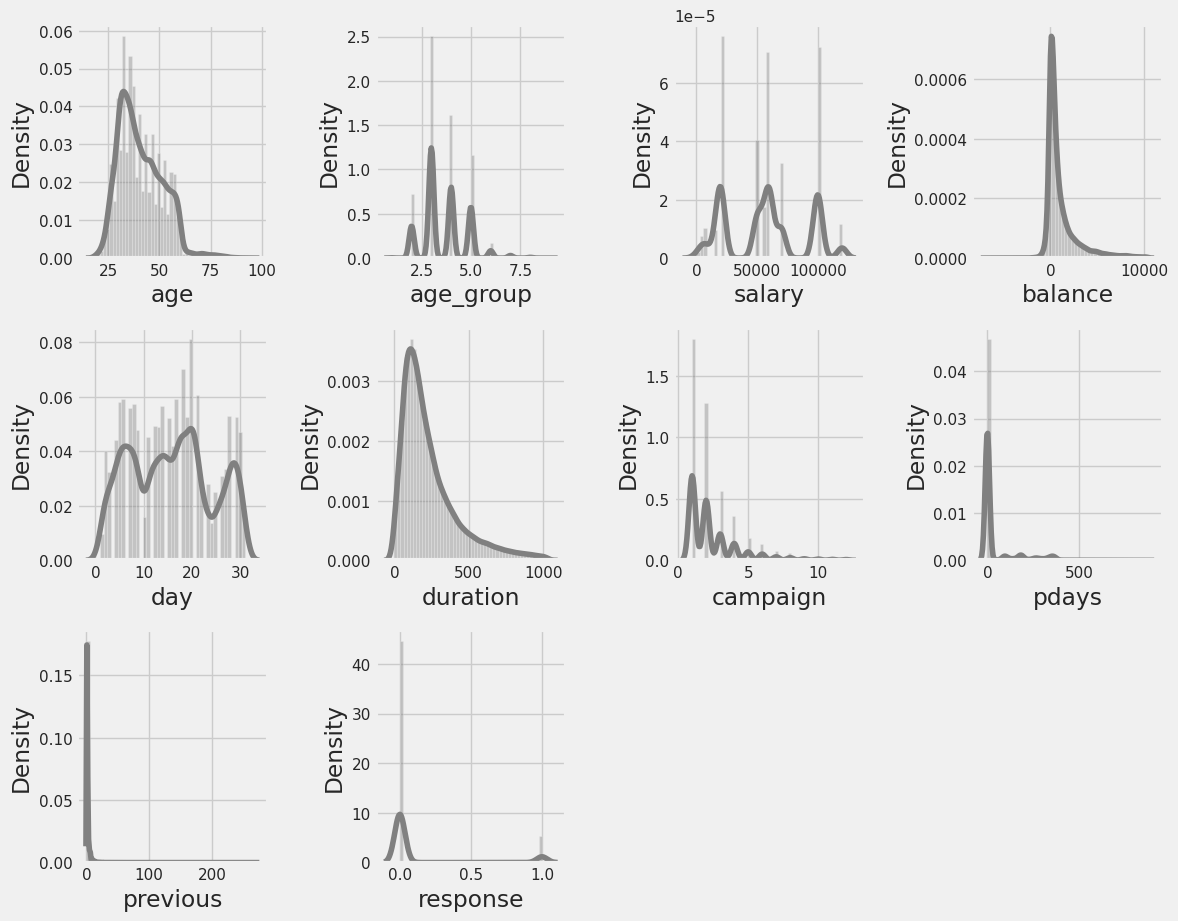

In [44]:
plt.figure(figsize=(12, 15))
for i in range(0, len(nums)):
    plt.subplot(5, int(np.ceil(len(nums)/3)), i+1) # Ensure the number of columns is an integer
    sns.distplot(df_new[nums[i]], color='gray')
    plt.tight_layout()

In [45]:
if 'contacted_date' in df_new.columns.to_list():
    df_new.drop(['contacted_date'], axis=1, inplace=True)
if 'pcontacted_date' in df_new.columns.to_list():
    df_new.drop(['pcontacted_date'], axis=1, inplace=True)


for f in df_new.select_dtypes(include='object').columns.to_list():
    df_new[f] = df_new[f].astype('category').cat.codes

df_new

,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,5,1,4,100000,1,2,6,1,0,2143,1,0,2,5,8,261,1,0,0,3,0
1,44,4,1,9,60000,2,1,9,1,0,29,1,0,2,5,8,151,1,0,0,3,0
2,33,3,1,2,120000,1,1,5,1,0,2,1,1,2,5,8,76,1,0,0,3,0
3,47,4,1,1,20000,1,3,7,0,0,1506,1,0,2,5,8,92,1,0,0,3,0
4,33,3,1,11,0,2,3,11,0,0,1,0,0,2,5,8,198,1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,2,1,9,60000,2,1,9,1,0,505,0,1,0,17,9,386,2,0,0,3,1
45206,51,5,1,9,60000,1,2,6,1,0,825,0,0,0,17,9,977,3,0,0,3,1
45207,71,7,0,5,55000,0,0,0,1,0,1729,0,0,0,17,9,456,2,0,0,3,1
45209,57,5,1,1,20000,1,1,5,1,0,668,0,0,1,17,9,508,4,0,0,3,0


<Figure size 2000x2000 with 0 Axes>

<Axes: >

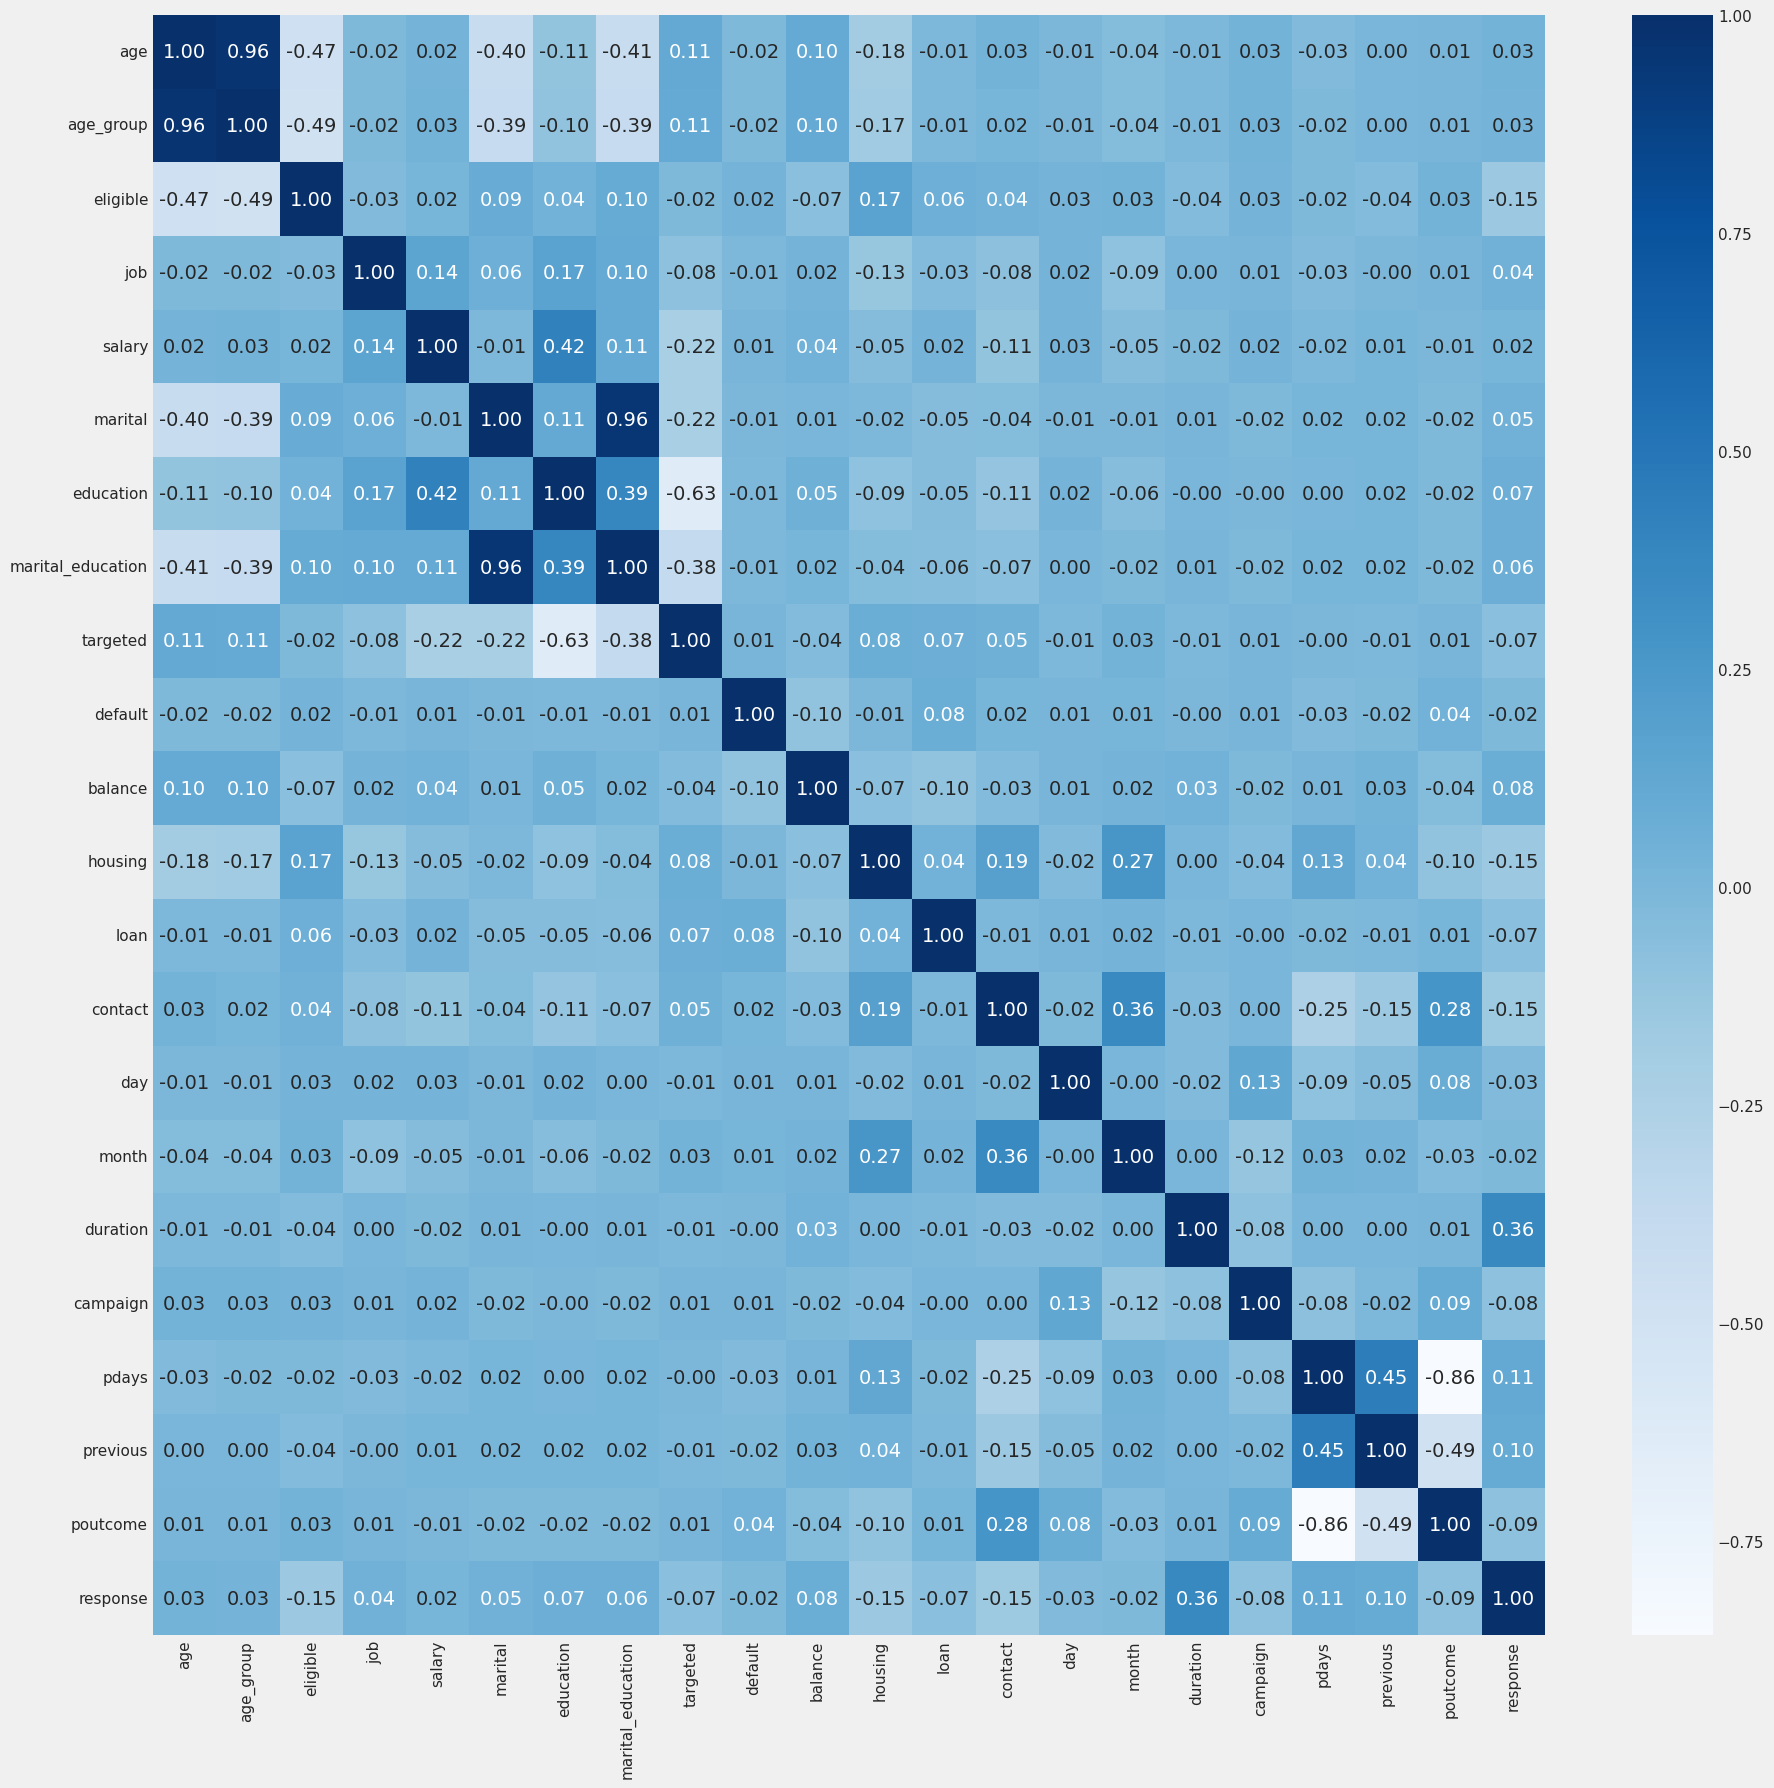

In [46]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')

In [47]:
df_new.describe()

,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
count,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000
mean,40.900813,3.642401,0.959936,4.331093,56800.852319,1.166647,1.218255,5.884843,0.822441,0.018217,1084.115906,0.558339,0.161566,0.639778,15.683846,5.543728,235.974571,2.452970,41.975273,0.590863,2.550004,0.107289
std,10.613921,1.082950,0.196111,3.279015,32036.813245,0.608849,0.747130,2.625806,0.382145,0.133737,1721.089369,0.496591,0.368057,0.898418,8.289161,3.004271,190.564406,1.941219,100.872381,2.329465,0.998664,0.309484
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,3.000000,1.000000,1.000000,20000.000000,1.000000,1.000000,5.000000,1.000000,0.000000,68.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,0.000000,0.000000,3.000000,0.000000
50%,39.000000,3.000000,1.000000,4.000000,60000.000000,1.000000,1.000000,5.000000,1.000000,0.000000,431.000000,1.000000,0.000000,0.000000,16.000000,6.000000,178.000000,2.000000,0.000000,0.000000,3.000000,0.000000
75%,48.000000,4.000000,1.000000,7.000000,70000.000000,2.000000,2.000000,9.000000,1.000000,0.000000,1347.000000,1.000000,0.000000,2.000000,21.000000,8.000000,307.000000,3.000000,0.000000,0.000000,3.000000,0.000000
max,95.000000,9.000000,1.000000,11.000000,120000.000000,2.000000,3.000000,11.000000,1.000000,1.000000,10483.000000,1.000000,1.000000,2.000000,31.000000,11.000000,1030.000000,12.000000,871.000000,275.000000,3.000000,1.000000


response
0    38125
1     4582
Name: count, dtype: int64

<Figure size 500x500 with 0 Axes>

<Axes: xlabel='response', ylabel='count'>

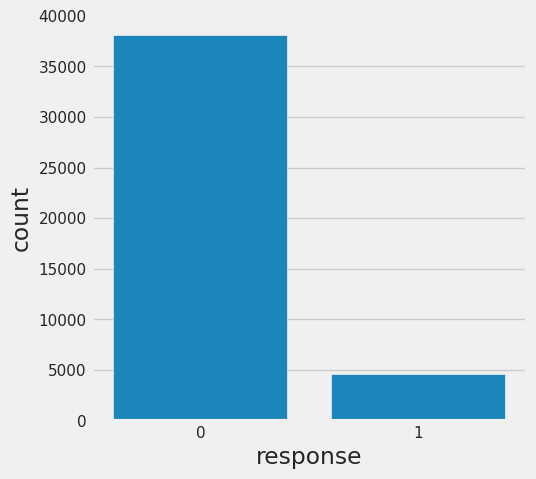

In [48]:
#check imbalance
df_new['response'].value_counts()
plt.figure(figsize=(5, 5))
sns.countplot(x ='response', data = df_new)

In [49]:
x = df_new.drop(['response'], axis=1)
y = df_new[['response']]

x.head()
y.head()

,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,5,1,4,100000,1,2,6,1,0,2143,1,0,2,5,8,261,1,0,0,3
1,44,4,1,9,60000,2,1,9,1,0,29,1,0,2,5,8,151,1,0,0,3
2,33,3,1,2,120000,1,1,5,1,0,2,1,1,2,5,8,76,1,0,0,3
3,47,4,1,1,20000,1,3,7,0,0,1506,1,0,2,5,8,92,1,0,0,3
4,33,3,1,11,0,2,3,11,0,0,1,0,0,2,5,8,198,1,0,0,3


,response
0,0
1,0
2,0
3,0
4,0


In [50]:
np.unique

<function unique at 0x7a0dbe0280b0>

In [56]:
from imblearn import under_sampling, over_sampling
x_over, y_over = over_sampling.SMOTE(sampling_strategy=0.5).fit_resample(x, y.values.ravel())

In [57]:
import pandas as pd
from imblearn import under_sampling, over_sampling

x_over, y_over = over_sampling.SMOTE(sampling_strategy=0.5).fit_resample(x, y.values.ravel())

y_over_series = pd.Series(y_over)

print('SMOTE')
print(y_over_series.value_counts())

SMOTE
0    38125
1    19062
Name: count, dtype: int64


In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.3, random_state = 42)

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("\nAccuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))

    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

DecisionTreeClassifier(random_state=42)


Accuracy (Test Set): 0.88
Precision (Test Set): 0.81
Recall (Test Set): 0.84
F1-Score (Test Set): 0.82
AUC: 0.87
[0.0405312  0.02063692 0.00918471 0.02187408 0.01616109 0.00788978
 0.01858463 0.02801283 0.01326956 0.00126299 0.06853935 0.12608803
 0.02584449 0.0510245  0.05440907 0.05943197 0.30806557 0.03038173
 0.03040482 0.00659445 0.06180824]


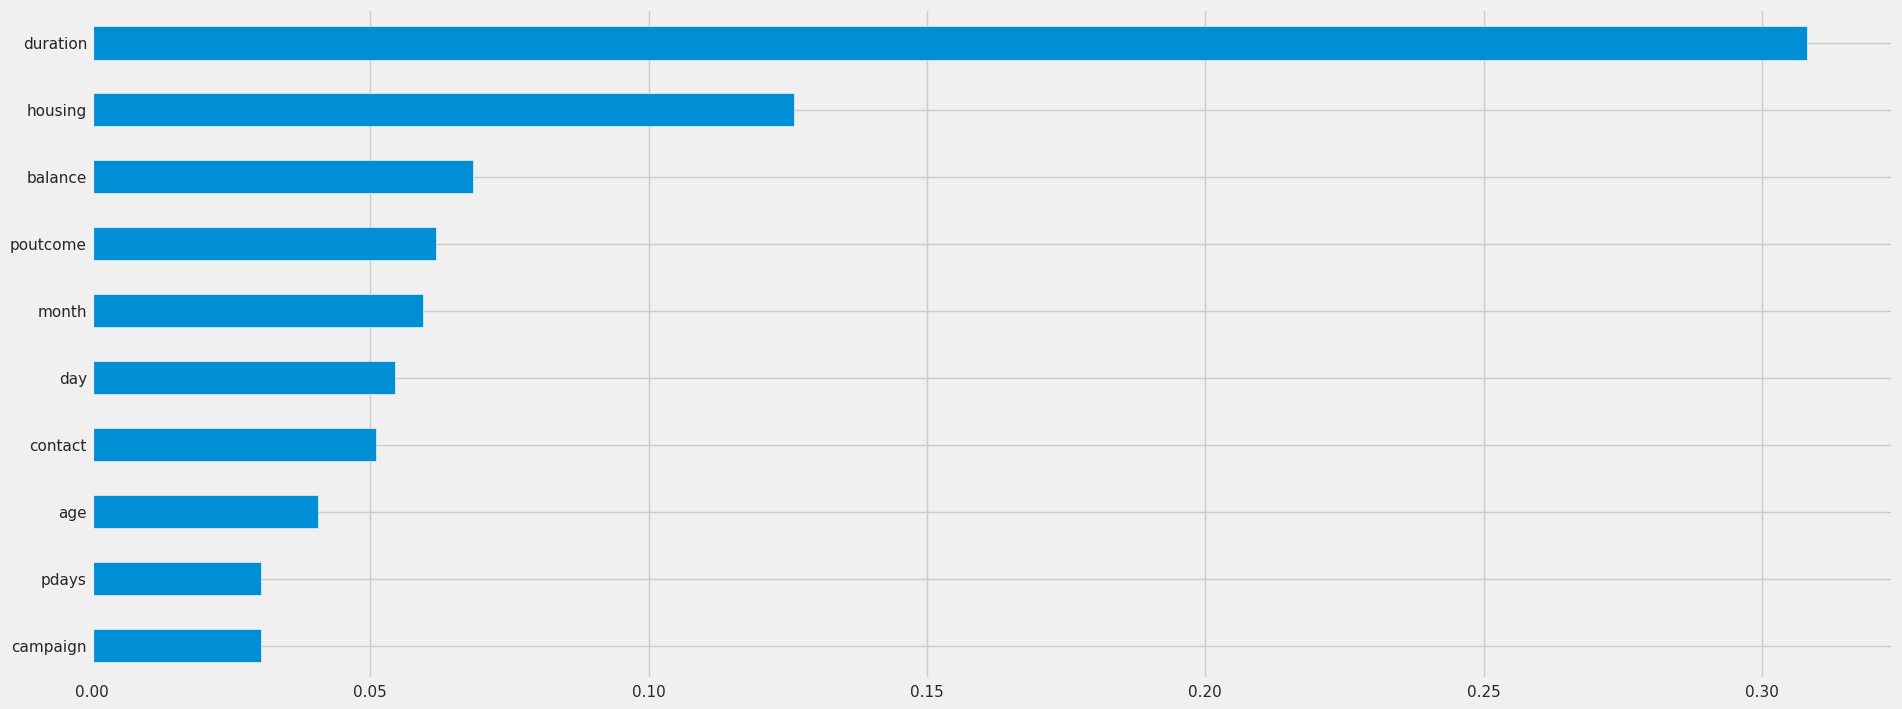

In [60]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
eval_classification(model, y_pred, x_train, y_train, x_test, y_test)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
# feat_importances = feat_importances.sort_values(ascending=True)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()

In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
eval_classification(model, y_pred, x_train, y_train, x_test, y_test)

LogisticRegression(random_state=42, solver='liblinear')


Accuracy (Test Set): 0.79
Precision (Test Set): 0.74
Recall (Test Set): 0.58
F1-Score (Test Set): 0.65
AUC: 0.74


ExtraTreesClassifier(random_state=42)


Accuracy (Test Set): 0.93
Precision (Test Set): 0.90
Recall (Test Set): 0.87
F1-Score (Test Set): 0.89
AUC: 0.91
[0.04907531 0.040385   0.02923478 0.02609943 0.02547247 0.02742574
 0.03463773 0.03763154 0.03305898 0.00207819 0.04856771 0.09341444
 0.02954874 0.0651791  0.05080178 0.05941389 0.20297993 0.04174477
 0.02569808 0.01567898 0.06187342]


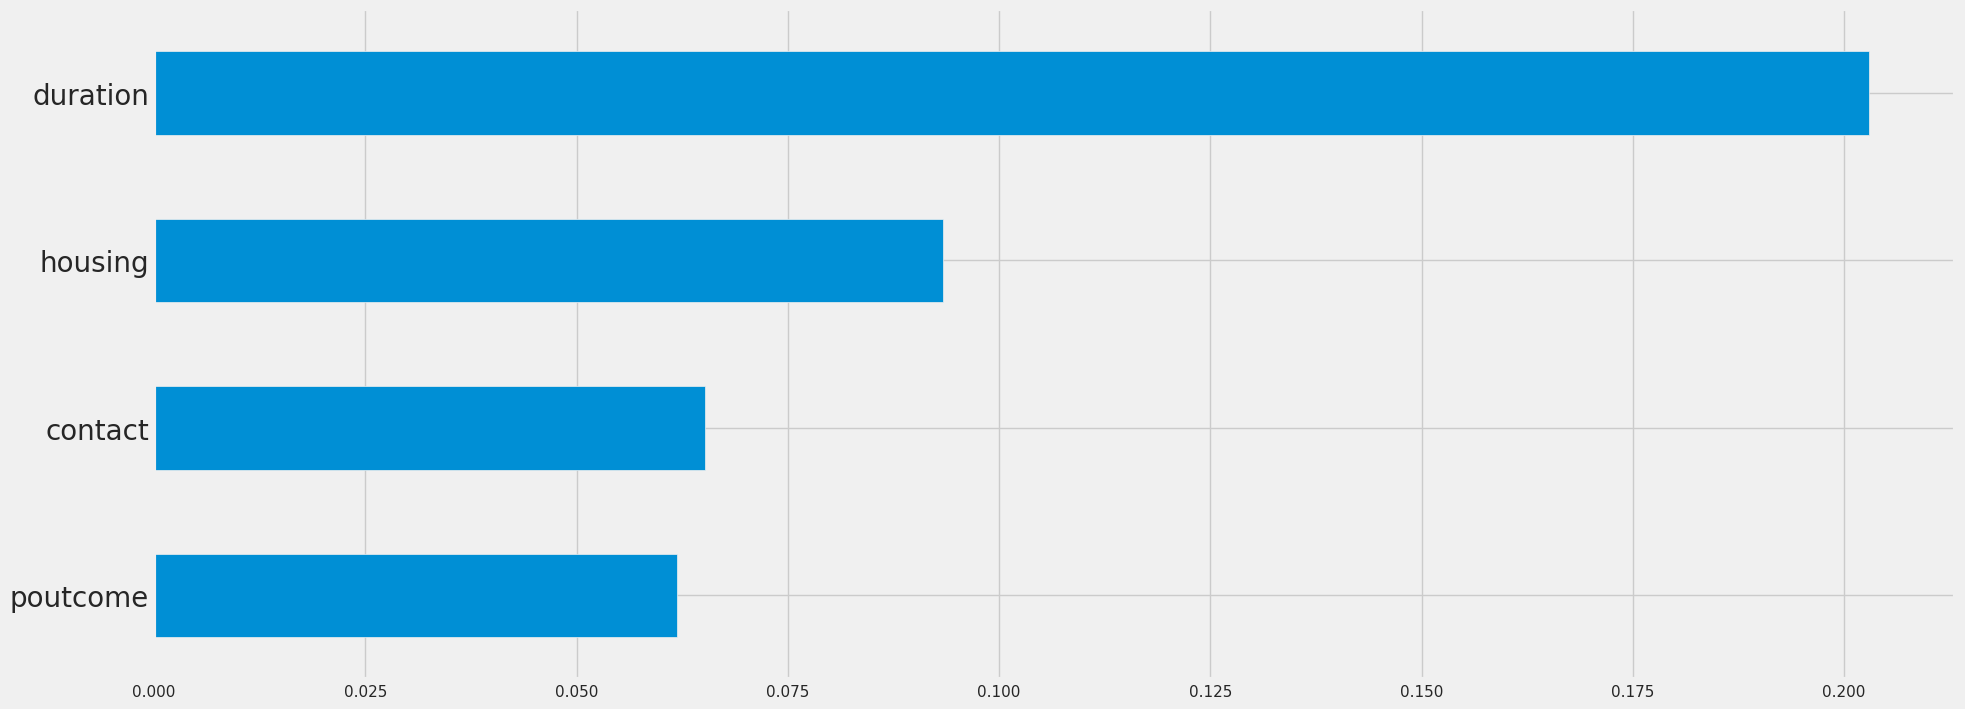

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
eval_classification(model, y_pred, x_train, y_train, x_test, y_test)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
# plt.figure(figsize=(12, 12))
plt.rcParams['ytick.labelsize'] = '20'
ax = feat_importances.nlargest(4).plot(kind='barh')
ax.invert_yaxis()
plt.show()

In [63]:
ypred1 = model.predict(x)
np.unique(ypred1, return_counts=True)

(array([0, 1]), array([38160,  4547]))

In [64]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
eval_classification(model, y_pred, x_train, y_train, x_test, y_test)

KNeighborsClassifier()


Accuracy (Test Set): 0.84
Precision (Test Set): 0.72
Recall (Test Set): 0.81
F1-Score (Test Set): 0.76
AUC: 0.83


In [65]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
eval_classification(model, y_pred, x_train, y_train, x_test, y_test)

DecisionTreeClassifier(random_state=42)


Accuracy (Test Set): 0.88
Precision (Test Set): 0.81
Recall (Test Set): 0.84
F1-Score (Test Set): 0.82
AUC: 0.87


In [66]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(x_train, y_train)

y_pred = xg.predict(x_test)
eval_classification(xg, y_pred, x_train, y_train, x_test, y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


Accuracy (Test Set): 0.93
Precision (Test Set): 0.90
Recall (Test Set): 0.88
F1-Score (Test Set): 0.89
AUC: 0.91


In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_features = ['auto', 'sqrt']

hyperparameters = dict(max_features=max_features)

# Inisialisasi Model
model = ExtraTreesClassifier(random_state=42)
model = RandomizedSearchCV(model, hyperparameters, cv=5, random_state=42, scoring='f1')
model.fit(x_train, y_train)
# Predict & Evaluation
y_pred = model.predict(x_test)
eval_classification(model, y_pred, x_train, y_train, x_test, y_test)

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
                   param_distributions={'max_features': ['auto', 'sqrt']},
                   random_state=42, scoring='f1')


Accuracy (Test Set): 0.93
Precision (Test Set): 0.90
Recall (Test Set): 0.87
F1-Score (Test Set): 0.89
AUC: 0.91
